# Leer y cargar archivos con DiPy y nibabel

Para instalar con pip:

In [1]:
#!pip install nibabel
#!pip install dipy
#!pip install vtk # Optional viual stuff

Instalación con conda:

In [2]:
#!conda install -c conda-forge nibabel
#!conda install -c conda-forge dipy
#!conda install vtk # Optional viual stuff

De la base de datos de DiPy descargamos una muestra con tres archivos básicos:
* Un archivo en formato Nifti (.nii) con el volumen de imágenes.
* Un archivo con los valores b.
* Un archivo con los vectores gradiente.

In [3]:
from dipy.data import fetch_sherbrooke_3shell
fetch_sherbrooke_3shell() # Download a 3shell HARDI dataset with 192 gradient direction

Dataset is already in place. If you want to fetch it again please first remove the folder /home/david/.dipy/sherbrooke_3shell 


({'HARDI193.bval': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bval',
   'e9b9bb56252503ea49d31fb30a0ac637'),
  'HARDI193.bvec': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.bvec',
   '0c83f7e8b917cd677ad58a078658ebb7'),
  'HARDI193.nii.gz': ('https://digital.lib.washington.edu/researchworks/bitstream/handle/1773/38475/HARDI193.nii.gz',
   '0b735e8f16695a37bfbd66aab136eb66')},
 '/home/david/.dipy/sherbrooke_3shell')

In [4]:
from os.path import expanduser, join
home = expanduser('~')
dname = join(home, '.dipy', 'sherbrooke_3shell')
print(dname)

/home/david/.dipy/sherbrooke_3shell


Nombres de los 3 archivos:

In [5]:
fdwi = join(dname, 'HARDI193.nii.gz')
fbval = join(dname, 'HARDI193.bval')
fbvec = join(dname, 'HARDI193.bvec')
print(fdwi)
print(fbval)
print(fbvec)

/home/david/.dipy/sherbrooke_3shell/HARDI193.nii.gz
/home/david/.dipy/sherbrooke_3shell/HARDI193.bval
/home/david/.dipy/sherbrooke_3shell/HARDI193.bvec


Cargamos los archivos con la librería ```nibabel```:

In [6]:
import nibabel as nib
img = nib.load(fdwi)
data = img.get_data() # 4D array

```data``` es un volumen de 60 imágenes de 128x128 con 196 direcciones gradiente.

In [7]:
print(data.shape)

(128, 128, 60, 193)


Podemos revisar también las dimensiones (en mm) de cada voxel:

In [8]:
print(img.header.get_zooms()[:3])

(2.0, 2.0, 2.0)


Podemos visualizar los datos con ```matplotlib```:

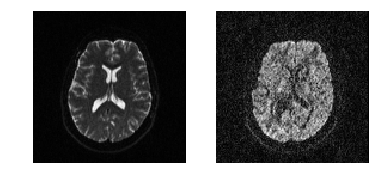

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

axial_middle = data.shape[2] // 2
plt.figure('Rebanada media')
plt.subplot(1, 2, 1).set_axis_off()
plt.imshow(data[:, :, axial_middle, 0].T, cmap='gray', origin='lower')
plt.subplot(1, 2, 2).set_axis_off()
plt.imshow(data[:, :, axial_middle, 10].T, cmap='gray', origin='lower')
plt.show()
#plt.savefig('data.png', bbox_inches='tight')

La primer imagen es una rebanada axial sin efectos de difusión, a diferencia de la segunda.

Para leer los archivos con los valores b y los vectores gradiente:

In [10]:
from dipy.io import read_bvals_bvecs
bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

Podemos usar el objeto ```gradient_table``` de DiPy para el manejo de información relevante:

In [11]:
from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals, bvecs)
print(gtab.info)

B-values shape (193,)
         min 0.000000 
         max 3500.000000 
B-vectors shape (193, 3)
         min -0.964050 
         max 0.999992 
None


In [12]:
print(gtab.bvals)

[    0.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.  1000.
  1000.  1000.  1000.  1000.  1000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.
  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  2000.  3500.
  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.  3500.
  3500

In [13]:
print(gtab.bvecs[:10, :])

[[ 0.          0.          0.        ]
 [ 0.999979   -0.00504001 -0.00402795]
 [ 0.          0.999992   -0.00398794]
 [-0.0257055   0.653861   -0.756178  ]
 [ 0.589518   -0.769236   -0.246462  ]
 [-0.235785   -0.529095   -0.815147  ]
 [-0.893578   -0.263559   -0.363394  ]
 [ 0.79784     0.133726   -0.587851  ]
 [ 0.232937    0.931884   -0.278087  ]
 [ 0.93672     0.144139   -0.31903   ]]


Parte del volumen correspondiente al valor b=0:

In [14]:
S0s = data[:, :, :, gtab.b0s_mask]
print(S0s.shape)

(128, 128, 60, 1)


Podemos guardar esta información con el comando:

In [15]:
#nib.save(nib.Nifti1Image(S0s, img.affine), 'HARDI193_S0.nii.gz')

Donde ```img.affine``` es la transformación que determina las coordenadas en el "mundo real":

In [16]:
img.affine

array([[   2.        ,    0.        ,   -0.        , -128.02410889],
       [   0.        ,    2.        ,   -0.        ,  -97.02124023],
       [  -0.        ,   -0.        ,    2.        ,  -73.61566162],
       [   0.        ,    0.        ,    0.        ,    1.        ]])